In [18]:
import sys
import itertools
import numpy as np

#!pip install torch===1.0.1 -f https://download.pytorch.org/whl/torch_stable.html

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs, GaussMembFunc, make_gauss_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


%matplotlib inline


In [19]:
def sin(x):
    return np.sin(x)

def noise(x, n = 0, m = .1):
    noise = np.random.normal(n, m, x.shape)
    return noise

def sin_noise(x, erro = 0.1):
    y = sin(x)
    y = y + noise(y, n = 0, m = y.max()*error)
    return y

def plot(x, y):
    plt.plot(x,y,'ro', label = 'sin')
    plt.legend(loc="upper right")
    plt.show()

### Training for 20 epochs, training size = 629 cases
epoch    0: MSE=0.25395, RMSE=0.50394 =inf%
epoch    1: MSE=0.25068, RMSE=0.50068 =inf%
epoch    2: MSE=0.13288, RMSE=0.36452 =inf%
epoch    3: MSE=0.06019, RMSE=0.24533 =inf%
epoch    4: MSE=0.04566, RMSE=0.21367 =inf%
epoch    5: MSE=0.02744, RMSE=0.16565 =inf%
epoch    6: MSE=0.02434, RMSE=0.15601 =inf%
epoch    7: MSE=0.01936, RMSE=0.13914 =inf%
epoch    8: MSE=0.01710, RMSE=0.13077 =inf%
epoch    9: MSE=0.01502, RMSE=0.12258 =inf%
epoch   10: MSE=0.01257, RMSE=0.11210 =inf%
epoch   11: MSE=0.01188, RMSE=0.10899 =inf%
epoch   12: MSE=0.01181, RMSE=0.10869 =inf%
epoch   13: MSE=0.01128, RMSE=0.10621 =inf%
epoch   14: MSE=0.01112, RMSE=0.10546 =inf%
epoch   15: MSE=0.01099, RMSE=0.10485 =inf%
epoch   16: MSE=0.01063, RMSE=0.10308 =inf%
epoch   17: MSE=0.01019, RMSE=0.10096 =inf%
epoch   18: MSE=0.01032, RMSE=0.10159 =inf%
epoch   19: MSE=0.01004, RMSE=0.10019 =inf%


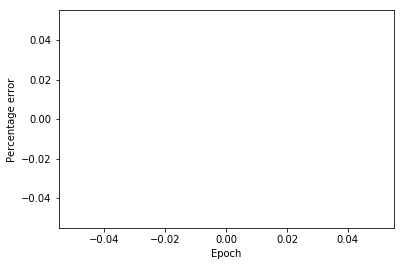

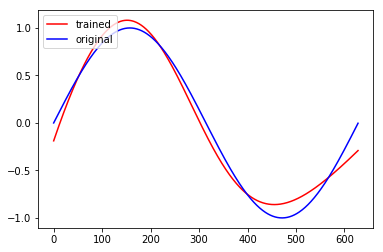

In [21]:
def make_sin_x(batch_size=1024, noise = 0.1):
    '''
        Generates a set of (x) values for the sin function.
    '''
    pts = torch.arange(0, 2*np.pi, 0.01)
    x = torch.tensor(list(itertools.product(pts)), dtype=dtype)
    if bool(noise):
        y = torch.tensor([[sin_noise(p, noise)] for p in x], dtype=dtype)
    else:
        y = torch.tensor([[sin(p)] for p in x], dtype=dtype)
        
    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

def make_sinc_xy(batch_size=1024):
    '''
        Generates a set of (x, y) values for the sync function.
        Use the range (-10,10) that was used in sec. V of Jang's paper.
    '''
    pts = torch.arange(-10, 11, 2)
    x = torch.tensor(list(itertools.product(pts, pts)), dtype=dtype)
    y = torch.tensor([[sinc(*p)] for p in x], dtype=dtype)
    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)


def ex1_model():
    '''
        These are the original (untrained) MFS for Jang's example 1.
    '''
    invardefs = [
            ('x0', make_gauss_mfs(0.1, [1.0,2.0]))
            ]
    outvars = ['y0']
    anf = anfis.AnfisNet('Jang\'s example 1', invardefs, outvars)
    return anf


model = ex1_model()
train_data = make_sin_x(batch_size=10, noise = 0)
train_anfis(model, train_data, 20, True)


